<strong><p style="font-size: 150%"> [✓] IMPORT LIB


In [223]:
import numpy as np
import math
import seaborn
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import zscore
import pandas as pd
import sklearn as sk

<strong><p style="font-size: 150%"> [✓] IMPORT CSV + DATA CLEANING

In [139]:
#charger les données 

fpStore = "PlayStore.csv"

# Bien regler les séparateurs
dataStore = pd.read_csv(fpStore, usecols = ['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Content Rating', 'Last Updated', 'Current Ver', 'Android Ver', 'Category (categorical)', 'Type (categorical)', 'Genres (categorical)', 'Last Updated (Year/Month) (categorical)','No_reviews_count', 'Reviews_present_count'])

In [140]:
dataStore.head(5)

,App,Rating,Reviews,Size,Installs,Content Rating,Last Updated,Current Ver,Android Ver,Category (categorical),Type (categorical),Genres (categorical),Last Updated (Year/Month) (categorical),No_reviews_count,Reviews_present_count
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000.0,Everyone,2018-01-07,118.0,15.0,ART_AND_DESIGN,Free,Art & Design,2018-01,0,0
1,Coloring book moana,3.9,967,14.0,500000.0,Everyone,2018-01-15,1015.0,15.0,ART_AND_DESIGN,Free,Art & Design;Pretend Play,2018-01,14,44
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000.0,Everyone,2018-08-01,464.0,15.0,ART_AND_DESIGN,Free,Art & Design,2018-08,0,0
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000.0,Teen,2018-06-08,2750.0,18.0,ART_AND_DESIGN,Free,Art & Design,2018-06,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000.0,Everyone,2018-06-20,277.0,20.0,ART_AND_DESIGN,Free,Art & Design;Creativity,2018-06,0,0


In [147]:
dataStore['Last Updated'] = pd.to_datetime(dataStore['Last Updated'])

dataStore['Last Updated (Year/Month) (categorical)'] = pd.to_datetime(dataStore['Last Updated (Year/Month) (categorical)'])

In [148]:
print(dataStore.shape)

(9659, 15)


In [149]:
print(dataStore.dtypes)

App                                                object
Rating                                            float64
Reviews                                             int64
Size                                              float64
Installs                                          float64
Content Rating                                     object
Last Updated                               datetime64[ns]
Current Ver                                       float64
Android Ver                                       float64
Category (categorical)                             object
Type (categorical)                                 object
Genres (categorical)                               object
Last Updated (Year/Month) (categorical)    datetime64[ns]
No_reviews_count                                    int64
Reviews_present_count                               int64
dtype: object


In [150]:
dataStore.head(5)

,App,Rating,Reviews,Size,Installs,Content Rating,Last Updated,Current Ver,Android Ver,Category (categorical),Type (categorical),Genres (categorical),Last Updated (Year/Month) (categorical),No_reviews_count,Reviews_present_count
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000.0,Everyone,2018-01-07,118.0,15.0,ART_AND_DESIGN,Free,Art & Design,2018-01-01,0,0
1,Coloring book moana,3.9,967,14.0,500000.0,Everyone,2018-01-15,1015.0,15.0,ART_AND_DESIGN,Free,Art & Design;Pretend Play,2018-01-01,14,44
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000.0,Everyone,2018-08-01,464.0,15.0,ART_AND_DESIGN,Free,Art & Design,2018-08-01,0,0
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000.0,Teen,2018-06-08,2750.0,18.0,ART_AND_DESIGN,Free,Art & Design,2018-06-01,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000.0,Everyone,2018-06-20,277.0,20.0,ART_AND_DESIGN,Free,Art & Design;Creativity,2018-06-01,0,0


In [154]:
dataStore = dataStore.dropna()
dataStore.isnull().any()

App                                        False
Rating                                     False
Reviews                                    False
Size                                       False
Installs                                   False
Content Rating                             False
Last Updated                               False
Current Ver                                False
Android Ver                                False
Category (categorical)                     False
Type (categorical)                         False
Genres (categorical)                       False
Last Updated (Year/Month) (categorical)    False
No_reviews_count                           False
Reviews_present_count                      False
dtype: bool

Nettoyage de données NULLE et vide , non exploitable et les dates placé en DateTime

## Problématique : Est-ce qu'un jeu, mieux il sera noté, plus il sera téléchargé ?
Grâce a cette problématique, l'on pourra savoir si une note haute corèle souvent avec un haut taux de téléchargement

Cela pourrais être très pratique pour les utilisateurs recherchant de très bon jeux parmis toute la liste, c'est un peu le même système que met en place PlayStore


# Partie 1 : Analyse graphique des données (Dataviz)

## Diagramme Gaussien

In [155]:
std = np.std(dataStore.Rating, ddof=1)
mean = np.mean(dataStore.Rating)

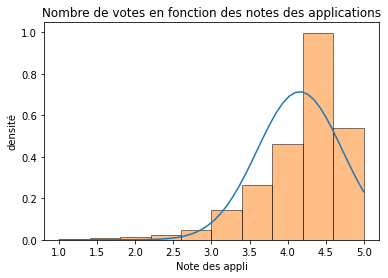

In [162]:
domain = np.linspace(np.min(dataStore.Rating), np.max(dataStore.Rating))
plt.plot(domain, norm.pdf(domain, mean, std))
plt.hist(dataStore.Rating, edgecolor = 'black', alpha = 0.5, density = True)


plt.title('Nombre de votes en fonction des notes des applications')
plt.xlabel('Note des appli')
plt.ylabel('densité')
plt.show()

On peux voir que la moyenne des notes ce situent surtout entre 4.0 et 4.5

## Boite a moustache avec données extrèmes

In [202]:
gameRating = pd.DataFrame()
gameRating['Rating'] = dataStore['Rating']
gameRating.head(5)

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3


In [200]:
gameInstalls = pd.DataFrame()
gameInstalls['Installs'] = dataStore['Installs']
gameInstalls.head(5)

,Installs
0,10000.0
1,500000.0
2,5000000.0
3,50000000.0
4,100000.0


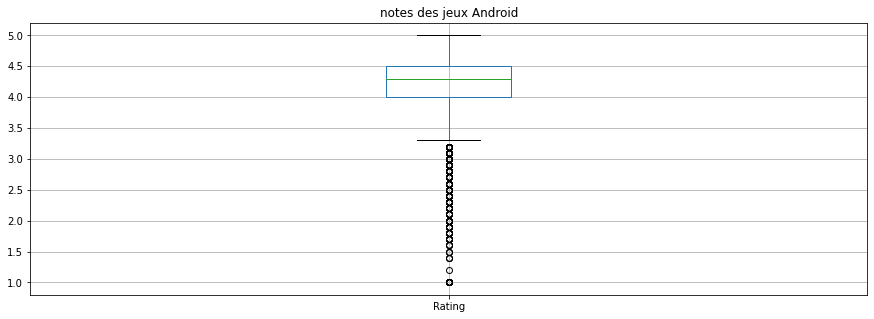

In [203]:
plt.figure(figsize=(15,5))
gameRating.boxplot()
plt.title("notes des jeux Android")
plt.show()

Des valeurs apparaissent en dehors des moyennes et sont extrème vers 1, souvent lié aux applications de faible facture ou de Bashage voulu par une grande communauté

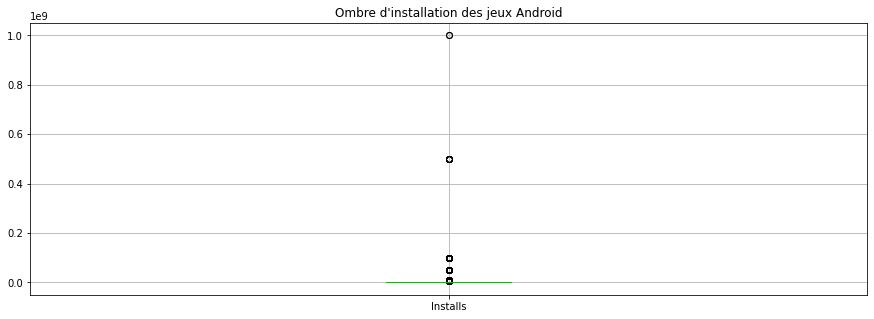

In [205]:
plt.figure(figsize=(15,5))
gameInstalls.boxplot()
plt.title("Nombre d'installation des jeux Android")
plt.show()

Ici l'on peux voir aussi que des extrèmes sont identifiable comme des jeux massivements téléchargé par énormément de personne ou alors des applications indispensable pour un téléphone.
On va devoir retirer les deux valeures aberrante

In [234]:
indexName = dataStore[(dataStore['Installs'] >= 500000)].index
dataStore.drop(indexName, inplace=True)

In [235]:
gameInstalls = pd.DataFrame()
gameInstalls['Installs'] = dataStore['Installs']
gameInstalls.head(5)

,Installs
0,10000.0
4,100000.0
5,50000.0
6,50000.0
9,10000.0


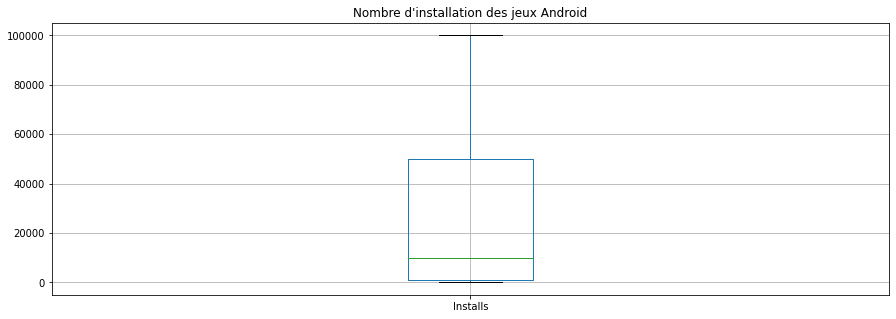

In [236]:
plt.figure(figsize=(15,5))
gameInstalls.boxplot()
plt.title("Nombre d'installation des jeux Android")
plt.show()

On obtiens désormais une boite a moustache bien plus clean

## HeatMap Correlation

In [237]:
dataStorecorr = dataStore[['Rating', 'Installs', 'Reviews']]
dataStorecorr.corr()

,Rating,Installs,Reviews
Rating,1.000000,-0.012797,0.114419
Installs,-0.012797,1.000000,0.454196
Reviews,0.114419,0.454196,1.000000


<AxesSubplot:>

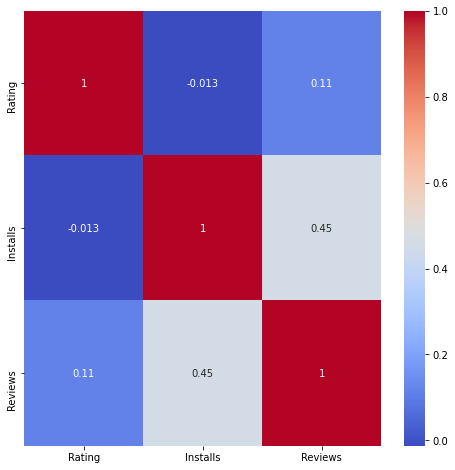

In [238]:
plt.figure(figsize = (8, 8))
seaborn.heatmap(dataStorecorr.corr(), annot = True, cmap = "coolwarm")

Avec cette HeatMap, l'on peux potentiellement prendre en compte que la note d'un jeu ou application sur le store ne dépend vraiment du nombre d'installation et potentiellement des reviews

## ChartPie

Je ne peux pas créer de ChartPie pour les valeurs utilisé dans mon tableau qui sont des extrèmes l'un a l'autres. Je n'ai eu non plus eu besoin de regrouper plusieurs valeurs dans une catégorie.

# Model Building

Creation de X et Y pour un nuage de point.

In [239]:
X = dataStore[['Installs']]
Y = dataStore[['Rating']]

# Créer une corrélation entre le nombre d'installation et la note global d'un jeu

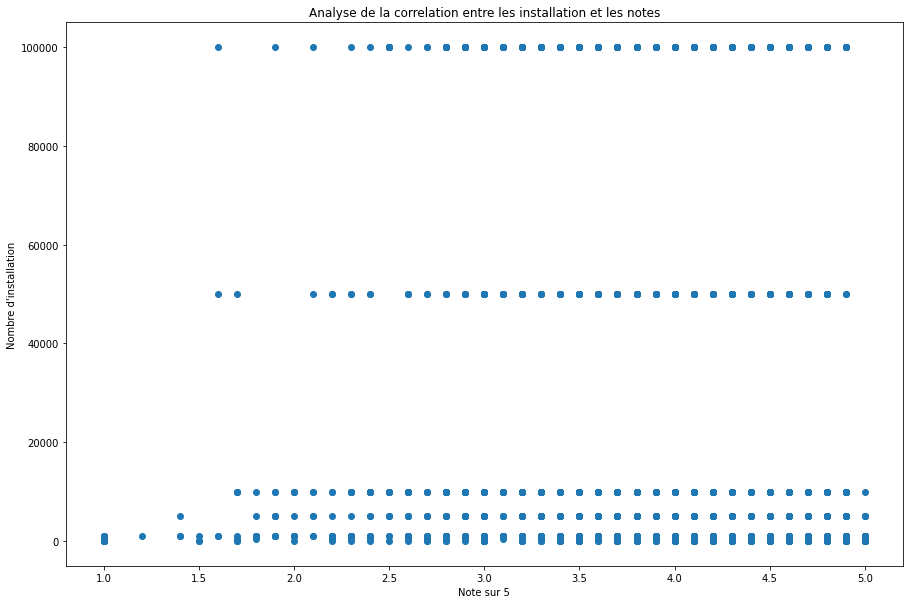

In [241]:
plt.figure(figsize=(15, 10))

plt.title("Analyse de la correlation entre les installation et les notes")
plt.xlabel("Note sur 5")
plt.ylabel("Nombre d'installation")

plt.scatter(Y, X)


On peux observer au final une très faible corrélation entre le nombre de téléchargement d'un logiciel et sa note.

## Create Split with SKlearn

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [254]:
X_train.head(5)

,Installs
9225,10000.0
8612,100000.0
8769,1000.0
5014,10000.0
7596,5000.0


## CREATION DE LINEARREGRESSION

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

clf = linear_model.LinearRegression(copy_X = True, fit_intercept = True, n_jobs = None, normalize = False)

In [256]:
clf.fit(X_train, Y_train)

LinearRegression()

<strong> Affichage du Coef </strong>

In [257]:
print('Coef : ', clf.coef_)
print('Intercept : ', clf.intercept_)

Coef :  [[-2.48121715e-07]]
Intercept :  [4.12078177]


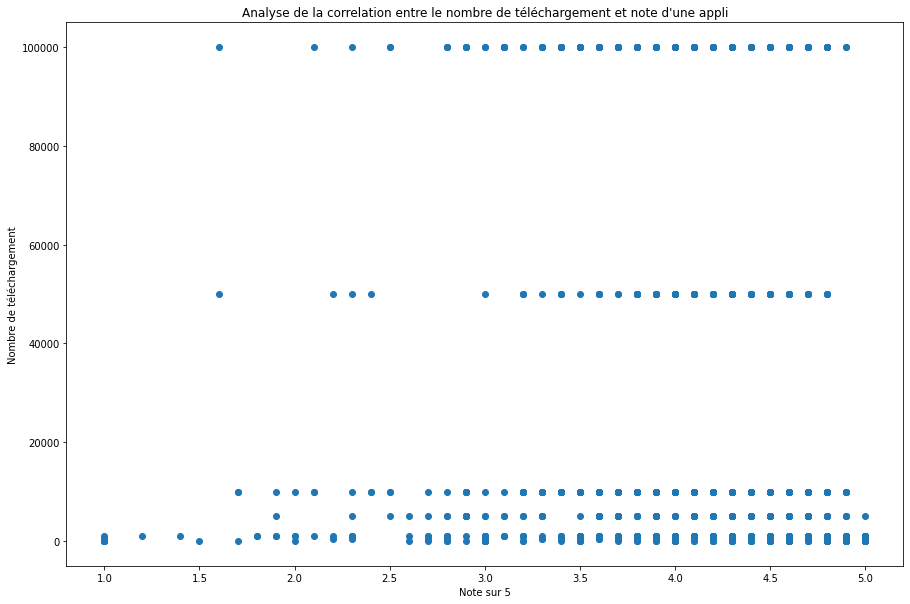

In [261]:
plt.figure(figsize = (15, 10))

plt.title("Analyse de la correlation entre le nombre de téléchargement et note d'une appli")
plt.xlabel("Note sur 5")
plt.ylabel("Nombre de téléchargement")

plt.scatter(Y_test, X_test)

Encore une fois, au vue du Coef et du graph, on a une fausse corrélation entre le nombre de téléchargement d'une application et la note d'une application.

## Calcul de prédiction sur X et du Squared_error

In [271]:
from sklearn.metrics import mean_squared_error, r2_score

In [272]:
Y_prediction = clf.predict(X_test)

In [273]:
Y_prediction

array([[4.10837569],
       [4.11830055],
       [4.11954116],
       ...,
       [4.0959696 ],
       [4.0959696 ],
       [4.0959696 ]])

In [274]:
print('Mean squared Error : %.2f' % mean_squared_error(Y_test, Y_prediction))

Mean squared Error : 0.49


In [275]:
print('Coef of determination : %.2f' % r2_score(Y_test, Y_prediction))

Coef of determination : -0.00


## Essayons sur une autre problématique !

<strong> on va alors essayer les mêmes étapes sur une problématique différentes de notre dataset !

### Tout bête et en guise de test, Est-ce que la taille d'une application influencera son nombre de téléchargement 